<a href="https://colab.research.google.com/github/noman13bd/ML-Practice/blob/master/ML_SamplingAnalysis_Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.model_selection import LeaveOneOut

In [52]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data (1).csv')
df.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6607,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,1,2,25.30,2153,1
1,2598,0,0,0,0,7,1,0,1,0,...,2,0,0,0,0,1,2,75.15,4396,0
2,2345,0,0,0,1,4,1,0,2,1,...,1,1,1,1,0,1,0,20.05,6211,0
3,4093,0,0,0,0,29,1,2,1,0,...,0,0,0,0,0,1,1,76.00,1850,0
4,693,0,0,0,0,3,1,2,1,0,...,0,0,0,0,0,1,1,75.10,2350,1


In [53]:
df.shape

(5282, 21)

In [54]:
df.drop(df.columns[df.columns.str.contains('Unnamed', case=False)], axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,2,25.30,2153,1
1,0,0,0,0,7,1,0,1,0,0,2,0,0,0,0,1,2,75.15,4396,0
2,0,0,0,1,4,1,0,2,1,1,1,1,1,1,0,1,0,20.05,6211,0
3,0,0,0,0,29,1,2,1,0,0,0,0,0,0,0,1,1,76.00,1850,0
4,0,0,0,0,3,1,2,1,0,0,0,0,0,0,0,1,1,75.10,2350,1


In [55]:
df.shape

(5282, 20)

In [56]:
df.Churn.value_counts()

0    3892
1    1390
Name: Churn, dtype: int64

In [57]:
df1 = df.copy()
df2 = df.copy()

In [58]:
df1.drop_duplicates(inplace=True)
df1.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [59]:
df1.Churn.value_counts()

0    3887
1    1382
Name: Churn, dtype: int64

In [60]:
total = 3892+1390
print(f"Percentage of 0: {(3892/total)*100} %")
print(f"Percentage of 1: {(1390/total)*100} %")

Percentage of 0: 73.68421052631578 %
Percentage of 1: 26.31578947368421 %


# Task1: Analysis the dataset using Seaborn  

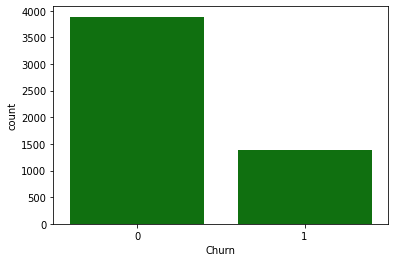

In [61]:
sns.countplot(x=df1.Churn, color='green')

**Some visualization of the dataset (single column (any) vs Churn)**

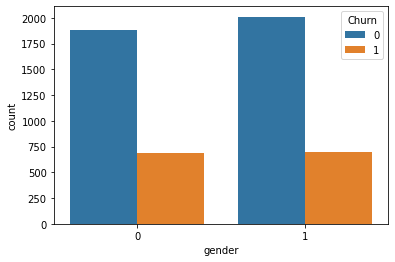

In [62]:
sns.countplot(x='gender', hue='Churn', data=df1)

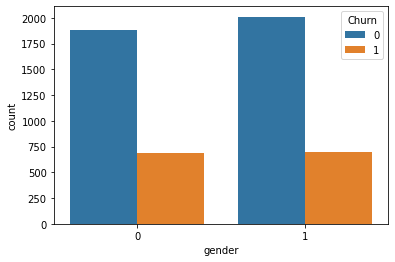

In [63]:
sns.countplot(x='gender', hue='Churn', data=df1)

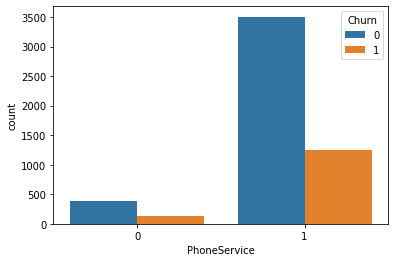

In [64]:
sns.countplot(x='PhoneService', hue='Churn', data=df1)

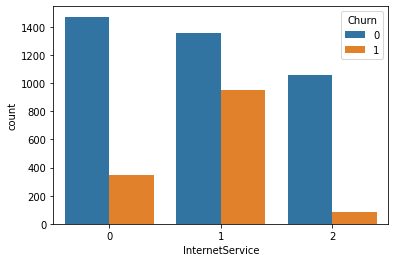

In [65]:
sns.countplot(x='InternetService', hue='Churn', data=df1)

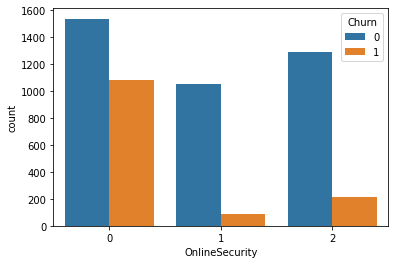

In [66]:
sns.countplot(x='OnlineSecurity', hue='Churn', data=df1)

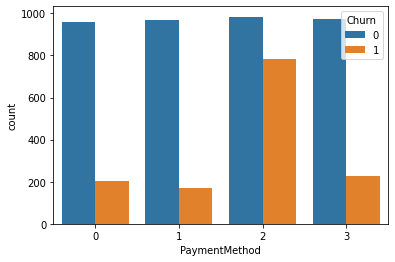

In [67]:
sns.countplot(x='PaymentMethod', hue='Churn', data=df1)

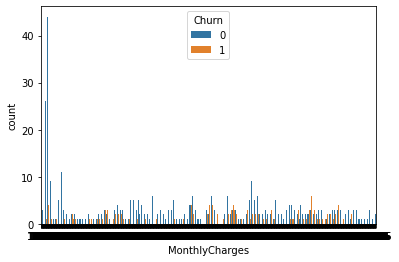

In [68]:
sns.countplot(x='MonthlyCharges', hue='Churn', data=df1)

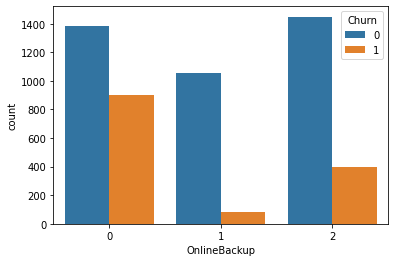

In [69]:
sns.countplot(x='OnlineBackup', hue='Churn', data=df1)

### **X and Y**

In [70]:
x = df1.drop('Churn', axis=1)
y = df1['Churn']

In [71]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,2,25.30,2153
1,0,0,0,0,7,1,0,1,0,0,2,0,0,0,0,1,2,75.15,4396
2,0,0,0,1,4,1,0,2,1,1,1,1,1,1,0,1,0,20.05,6211
3,0,0,0,0,29,1,2,1,0,0,0,0,0,0,0,1,1,76.00,1850
4,0,0,0,0,3,1,2,1,0,0,0,0,0,0,0,1,1,75.10,2350


In [72]:
y.head()

0    1
1    0
2    0
3    0
4    1
Name: Churn, dtype: int64

# Task 2: SMOTETomek sampling and CVs
Synthetic Minority Oversampling Technique

In [73]:
# get train and test dataset without sampling
xtrain_nos, xtest_nos, ytrain_nos, ytest_nos = train_test_split(x, y, train_size=.75, random_state=42) 

**do the SMOTETomek sampling and get train, test data set**

In [ ]:
!pip install imblearn

In [75]:
# https://imbalanced-learn.org/dev/references/generated/imblearn.combine.SMOTETomek.html
from imblearn.combine import SMOTETomek
smotetomek = SMOTETomek(random_state=42) 

In [76]:
y.value_counts()

0    3887
1    1382
Name: Churn, dtype: int64

In [77]:
x_smot, y_smot = smotetomek.fit_resample(x, y)
print(f"new shape of x: {x_smot.shape}")
print(f"new shape of y: {y_smot.shape}")
print(f"y value count: {y_smot.value_counts()}")

new shape of x: (7168, 19)
new shape of y: (7168,)
y value count: 1    3584
0    3584
Name: Churn, dtype: int64


In [78]:
xtrain_smot, xtest_smot, ytrain_smot, ytest_smot = train_test_split(x_smot, y_smot, train_size=.75, random_state=42) 

In [79]:
# create decision tree classifier model with before and after sampled data
from sklearn.tree import DecisionTreeClassifier
dt_classifier_nos = DecisionTreeClassifier()
dt_classifier_smot = DecisionTreeClassifier()
dt_classifier_nos.fit(xtrain_nos, ytrain_nos)
print(f"DecisionTreeClassifier score without sampled data: {dt_classifier_nos.score(xtest_nos, ytest_nos)}")
dt_classifier_smot.fit(xtrain_smot, ytrain_smot)
print(f"DecisionTreeClassifier score with SMOT sampled data: {dt_classifier_smot.score(xtest_smot, ytest_smot)}")

DecisionTreeClassifier score without sampled data: 0.701062215477997
DecisionTreeClassifier score with SMOT sampled data: 0.7885044642857143


In [80]:
# now check different cross validations for this model
smot_skf = StratifiedKFold(n_splits=4)
score_smot_skf = cross_val_score(dt_classifier_smot, x_smot, y_smot,cv=smot_skf)
smot_kfold = KFold(n_splits=4)
score_smot_kfold = cross_val_score(dt_classifier_smot, x_smot, y_smot,cv=smot_kfold)
smot_loo = LeaveOneOut()
score_smot_loo = cross_val_score(dt_classifier_smot, x_smot, y_smot,cv=smot_loo)
print(f"DecisionTreeClassifier score with SMOTETomek sampled data - StratifiedKFold: {score_smot_skf}")
print(f"DecisionTreeClassifier score with SMOTETomek sampled data - KFold: {score_smot_kfold}")
print(f"DecisionTreeClassifier score with SMOTETomek sampled data - LeaveOneOut: {score_smot_loo}")

DecisionTreeClassifier score with SMOTETomek sampled data - StratifiedKFold: [0.68191964 0.796875   0.85546875 0.84375   ]
DecisionTreeClassifier score with SMOTETomek sampled data - KFold: [0.73046875 0.75558036 0.79799107 0.859375  ]
DecisionTreeClassifier score with SMOTETomek sampled data - LeaveOneOut: [0. 1. 0. ... 1. 1. 1.]


# Task 3: Near Miss Undersampling and CVs

In [81]:
# get train and test dataset without sampling
xtrain_nos, xtest_nos, ytrain_nos, ytest_nos = train_test_split(x, y, train_size=.75, random_state=42) 

**do the Undersampling and get train, test data set**

In [82]:
from imblearn.under_sampling import NearMiss
near_miss = NearMiss()

In [83]:
y.value_counts()

0    3887
1    1382
Name: Churn, dtype: int64

In [84]:
x_nm, y_nm = near_miss.fit_resample(x, y)
print(f"new shape of x: {x_nm.shape}")
print(f"new shape of y: {y_nm.shape}")
print(f"y value count: {y_nm.value_counts()}")

new shape of x: (2764, 19)
new shape of y: (2764,)
y value count: 0    1382
1    1382
Name: Churn, dtype: int64


In [85]:
xtrain_nm, xtest_nm, ytrain_nm, ytest_nm = train_test_split(x_nm, y_nm, train_size=.75, random_state=42) 

In [86]:
# create decision tree classifier model with before and after sampled data
from sklearn.tree import DecisionTreeClassifier
dt_classifier_nos = DecisionTreeClassifier()
dt_classifier_nm = DecisionTreeClassifier()
dt_classifier_nos.fit(xtrain_nos, ytrain_nos)
print(f"DecisionTreeClassifier score without sampled data: {dt_classifier_nos.score(xtest_nos, ytest_nos)}")
dt_classifier_nm.fit(xtrain_nm, ytrain_nm)
print(f"DecisionTreeClassifier score with Near Miss Under sampled data: {dt_classifier_nm.score(xtest_nm, ytest_nm)}")

DecisionTreeClassifier score without sampled data: 0.7018209408194234
DecisionTreeClassifier score with Near Miss Under sampled data: 0.5991316931982634


In [87]:
# now check different cross validations for this model
nm_skf = StratifiedKFold(n_splits=4)
score_nm_skf = cross_val_score(dt_classifier_nm, x_nm, y_nm,cv=nm_skf)
nm_kfold = KFold(n_splits=4)
score_nm_kfold = cross_val_score(dt_classifier_nm, x_nm, y_nm,cv=nm_kfold)
nm_loo = LeaveOneOut()
score_nm_loo = cross_val_score(dt_classifier_nm, x_nm, y_nm,cv=nm_loo)
print(f"DecisionTreeClassifier score with NearMiss sampled data - StratifiedKFold: {score_nm_skf}")
print(f"DecisionTreeClassifier score with NearMiss sampled data - KFold: {score_nm_kfold}")
print(f"DecisionTreeClassifier score with NearMiss sampled data - LeaveOneOut: {score_nm_loo}")


DecisionTreeClassifier score with NearMiss sampled data - StratifiedKFold: [0.51664255 0.58031838 0.59044863 0.54703329]
DecisionTreeClassifier score with NearMiss sampled data - KFold: [0.35600579 0.41389291 0.47467438 0.45296671]
DecisionTreeClassifier score with NearMiss sampled data - LeaveOneOut: [0. 0. 0. ... 0. 1. 1.]


# Task 4: Over sampling and CVs

In [88]:
# get train and test dataset without sampling
xtrain_nos, xtest_nos, ytrain_nos, ytest_nos = train_test_split(x, y, train_size=.75, random_state=42) 

**do the Over sampling and get train, test data set**

In [89]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=100)

In [90]:
y.value_counts()

0    3887
1    1382
Name: Churn, dtype: int64

In [91]:
x_ros, y_ros = ros.fit_resample(x, y)
print(f"new shape of x: {x_ros.shape}")
print(f"new shape of y: {y_ros.shape}")
print(f"y value count: {y_ros.value_counts()}")

new shape of x: (7774, 19)
new shape of y: (7774,)
y value count: 1    3887
0    3887
Name: Churn, dtype: int64


In [92]:
xtrain_ros, xtest_ros, ytrain_ros, ytest_ros = train_test_split(x_ros, y_ros, train_size=.75, random_state=42) 

In [93]:
# create decision tree classifier model with before and after sampled data
from sklearn.tree import DecisionTreeClassifier
dt_classifier_nos = DecisionTreeClassifier()
dt_classifier_ros = DecisionTreeClassifier()
dt_classifier_nos.fit(xtrain_nos, ytrain_nos)
print(f"DecisionTreeClassifier score without sampled data: {dt_classifier_nos.score(xtest_nos, ytest_nos)}")
dt_classifier_ros.fit(xtrain_ros, ytrain_ros)
print(f"DecisionTreeClassifier score with Over sampled data: {dt_classifier_ros.score(xtest_ros, ytest_ros)}")

DecisionTreeClassifier score without sampled data: 0.704855842185129
DecisionTreeClassifier score with Over sampled data: 0.8410493827160493


In [94]:
# now check different cross validations for this model
skf = StratifiedKFold(n_splits=4)
score_skf = cross_val_score(dt_classifier_ros, x_ros, y_ros,cv=skf)
kfold = KFold(n_splits=4)
score_kfold = cross_val_score(dt_classifier_ros, x_ros, y_ros,cv=kfold)
loo = LeaveOneOut()
score_loo = cross_val_score(dt_classifier_ros, x_ros, y_ros,cv=loo)
print(f"DecisionTreeClassifier score with Over sampled data - StratifiedKFold: {score_skf}")
print(f"DecisionTreeClassifier score with Over sampled data - KFold: {score_kfold}")
print(f"DecisionTreeClassifier score with Over sampled data - LeaveOneOut: {score_loo}")

DecisionTreeClassifier score with Over sampled data - StratifiedKFold: [0.85288066 0.8590535  0.89140504 0.88934637]
DecisionTreeClassifier score with Over sampled data - KFold: [0.80658436 0.82098765 0.85846629 0.99536799]
DecisionTreeClassifier score with Over sampled data - LeaveOneOut: [1. 1. 1. ... 1. 1. 1.]


In [95]:
score_skf.mean()

0.8731713929289271

# Evaluation

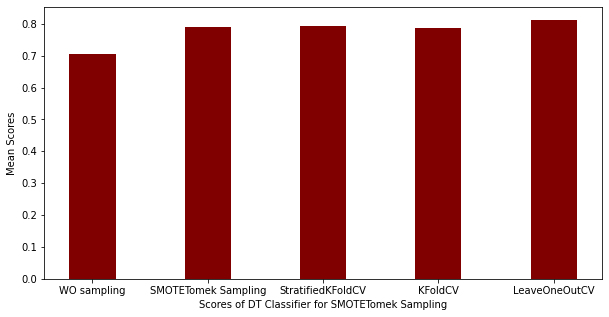

In [96]:
# display overall score for SMOTETomek Sampling in bar chart
data = {
        'WO sampling':dt_classifier_nos.score(xtest_nos, ytest_nos), 
        'SMOTETomek Sampling':dt_classifier_smot.score(xtest_smot, ytest_smot), 
        'StratifiedKFoldCV':score_smot_skf.mean(),
        'KFoldCV':score_smot_kfold.mean(),
        'LeaveOneOutCV':score_smot_loo.mean()
        }
keys = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(keys, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Scores of DT Classifier for SMOTETomek Sampling")
plt.ylabel("Mean Scores")
plt.title("")
plt.show()

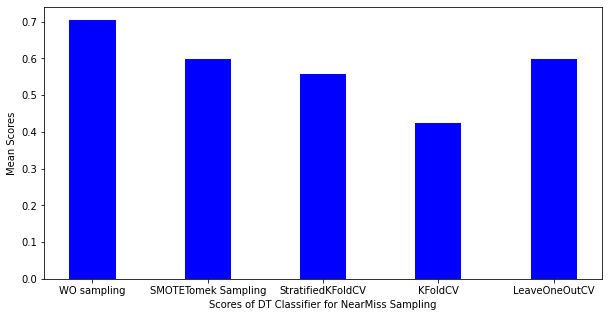

In [97]:
# display overall score for SMOTETomek Sampling in bar chart
data = {
        'WO sampling':dt_classifier_nos.score(xtest_nos, ytest_nos), 
        'SMOTETomek Sampling':dt_classifier_nm.score(xtest_nm, ytest_nm), 
        'StratifiedKFoldCV':score_nm_skf.mean(),
        'KFoldCV':score_nm_kfold.mean(),
        'LeaveOneOutCV':score_nm_loo.mean()
        }
keys = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(keys, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Scores of DT Classifier for NearMiss Sampling")
plt.ylabel("Mean Scores")
plt.title("")
plt.show()

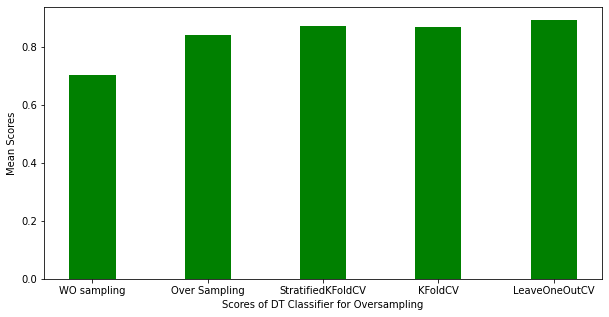

In [98]:
# display overall score for oversampling in bar chart
data = {
        'WO sampling':dt_classifier_nos.score(xtest_nos, ytest_nos), 
        'Over Sampling':dt_classifier_ros.score(xtest_ros, ytest_ros), 
        'StratifiedKFoldCV':score_skf.mean(),
        'KFoldCV':score_kfold.mean(),
        'LeaveOneOutCV':score_loo.mean()
        }
keys = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(keys, values, color ='green',
        width = 0.4)
 
plt.xlabel("Scores of DT Classifier for Oversampling")
plt.ylabel("Mean Scores")
plt.title("")
plt.show()